# __Date and TimeDelta in Pandas__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:

- Date and TimeDelta in Pandas
- Date Handling in Pandas
  * Extracting Components from Dates
- Timedelta in Pandas
  * Creating a Timedelta
  * Performing Arithmetic Operations
  * Resampling Time Series Data
- Categorical Data Handling
  * Creating a Categorical Variable
  * Counting Occurrences of Each Category
  * Creating Dummy Variables
  * Label Encoding

##  __1. Date and TimeDelta in Pandas__

In Pandas, the datetime module provides robust functionality for handling date and time data, while the timedelta class allows for convenient manipulation of time intervals. This combination is particularly useful for time-based analysis and working with temporal data in a DataFrame.

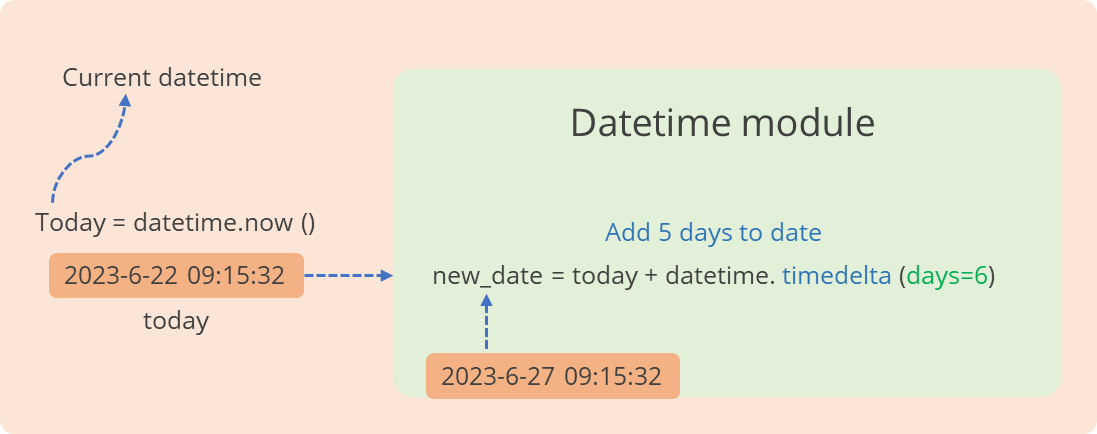

## __2. Date Handling in Pandas__
#### Creating a Date Range:

- The date_range function is used to generate a sequence of dates within a specified range. 
- It is a powerful tool for creating time indices or date columns in a DataFrame. 
- The start and end parameters define the range, while freq determines the frequency, such as daily (D) or monthly (M).

In [1]:
import pandas as pd

# Generate a date range
date_range = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
print(date_range)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


### __2.1 Extracting Components from Dates__

Pandas provides the dt accessor to extract various components (Example: day, month, year) from a date column in a DataFrame. This is valuable for time-based analysis when specific date attributes need to be considered.

In [2]:
import pandas as pd

# Assuming 'df' is your DataFrame with a 'Date' column
data = {'Date': ['2023-01-01', '2023-02-15', '2023-03-20']}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date']) # convert the string to date time data type

# Extracting day, month, and year information
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Displaying the DataFrame with extracted information
print(df[['Date', 'Day', 'Month', 'Year']])


        Date  Day  Month  Year
0 2023-01-01    1      1  2023
1 2023-02-15   15      2  2023
2 2023-03-20   20      3  2023


In [3]:
# Extracting weekday and weekend information
df = pd.DataFrame({'Date': pd.date_range(start='2023-01-01', periods=5)})
df['Weekday'] = df['Date'].dt.weekday
df['IsWeekend'] = df['Date'].dt.weekday // 5 == 1
print(df[['Date', 'Weekday', 'IsWeekend']])

        Date  Weekday  IsWeekend
0 2023-01-01        6       True
1 2023-01-02        0      False
2 2023-01-03        1      False
3 2023-01-04        2      False
4 2023-01-05        3      False


In [4]:
# Shifting dates forward or backward
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date         datetime64[ns]
Weekday               int64
IsWeekend              bool
dtype: object

In [7]:
df

,Date,Weekday,IsWeekend
0,2023-01-01,6,True
1,2023-01-02,0,False
2,2023-01-03,1,False
3,2023-01-04,2,False
4,2023-01-05,3,False


In [9]:
df['Date'] + pd.Timedelta(days=2)

0   2023-01-03
1   2023-01-04
2   2023-01-05
3   2023-01-06
4   2023-01-07
Name: Date, dtype: datetime64[ns]

In [ ]:
# Shifting dates forward or backward
df['Date'] = pd.to_datetime(df['Date'])
df['PreviousDate'] = df['Date'] - pd.Timedelta(days=1)
df['NextDate'] = df['Date'] + pd.Timedelta(days=1)
print(df[['Date', 'PreviousDate', 'NextDate']])

## __3. Timedelta in Pandas__
### __3.1 Creating a Timedelta__

- The Timedelta class in Pandas represents a duration or the difference between two dates or times. 
- It can be created by specifying the desired duration, such as days, hours, or minutes.

In [10]:
import pandas as pd

# Creating a timedelta of 3 days
delta = pd.Timedelta(days=3)

### __3.2 Performing Arithmetic Operations__

Timedelta objects can be used to perform arithmetic operations on dates. For example, adding a timedelta to a date results in a new date. This is useful for calculating future or past dates based on a given time interval.

In [11]:
# Performing arithmetic operations with timedeltas
df['Date'] = pd.to_datetime(df['Date'])
df['FutureDate'] = df['Date'] + pd.Timedelta(weeks=2, days=3, hours=12)
print(df[['Date', 'FutureDate']])

        Date          FutureDate
0 2023-01-01 2023-01-18 12:00:00
1 2023-01-02 2023-01-19 12:00:00
2 2023-01-03 2023-01-20 12:00:00
3 2023-01-04 2023-01-21 12:00:00
4 2023-01-05 2023-01-22 12:00:00


### __3.3 Resampling Time Series Data__

Time series data often comes with irregular time intervals. Resampling is the process of changing the frequency of the time series data, either by upsampling (increasing frequency) or downsampling (decreasing frequency).

In [13]:
df

,Date,Weekday,IsWeekend,FutureDate
0,2023-01-01,6,True,2023-01-18 12:00:00
1,2023-01-02,0,False,2023-01-19 12:00:00
2,2023-01-03,1,False,2023-01-20 12:00:00
3,2023-01-04,2,False,2023-01-21 12:00:00
4,2023-01-05,3,False,2023-01-22 12:00:00


In [14]:
# Resampling time series data
df_resampled = df.resample('M', on='Date').sum()
print(df_resampled)

            Weekday  IsWeekend
Date                          
2023-01-31       12          1


/var/folders/xk/0pfb24315clcz5hhv8f69q5c0000gp/T/ipykernel_33181/881699312.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M', on='Date').sum()


## __4. Categorical Data Handling__

### __4.1 Creating a Categorical Variable__
Pandas provides the Categorical class to create a categorical variable. Categorical variables are useful when dealing with data that can be divided into distinct, non-numeric categories.

In [15]:
import pandas as pd

# Creating a categorical variable
categories = ['Low', 'Medium', 'High']
values = ['Low', 'Medium', 'High', 'Low', 'High']
cat_variable = pd.Categorical(values, categories=categories, ordered=True)
print(cat_variable)

['Low', 'Medium', 'High', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


### __4.2 Counting Occurrences of Each Category__
The value_counts() method is used to count the occurrences of each category in a categorical column of a DataFrame.

In [ ]:
# Assuming 'df' is your DataFrame with a 'Category' column
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A']})

# Counting occurrences of each category
category_counts = df['Category'].value_counts()
print(category_counts)


In [17]:
df = pd.read_csv("HousePrices.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [18]:
pd.get_dummies(df['city'],prefix='city')

,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### __4.3 Creating Dummy Variables__

When working with machine learning models or statistical analyses, creating dummy variables is often necessary to represent categorical data numerically. The get_dummies function accomplishes this by creating binary columns for each category.

In [ ]:
# Assuming 'df' is your DataFrame with a 'Category' column
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A']})

# Creating dummy variables for categorical data
dummy_variables = pd.get_dummies(df['Category'], prefix='Category')
print(dummy_variables)


### __4.4 Label Encoding__

Another way to handle categorical data is through label encoding, where each category is assigned a unique numerical label. This is useful in scenarios where ordinal relationships exist between categories.

In [20]:
# Assuming 'df' is your DataFrame with a 'Category' column
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A']})

# Label Encoding
df['Category_LabelEncoded'] = df['Category'].astype('category').cat.codes
print(df[['Category', 'Category_LabelEncoded']])

  Category  Category_LabelEncoded
0        A                      0
1        B                      1
2        A                      0
3        C                      2
4        B                      1
5        A                      0


# __Assisted Practice__

## __Problem Statement:__
Analyze the housing dataset with a focus on handling date and categorical data to gain insights into house sales over time and the influence of house characteristics on its price.

## __Steps to Perform:__
- Convert the __YearBuilt__ and __YearRemodAdd__ columns to datetime format (if not converted)
- Extract useful components from the date like the year, month, or day
- Calculate the time difference between the year the house was built and the year it was remodeled
- Perform necessary arithmetic operations
- Count the number of occurrences of each category in categorical features
- Create dummy variables for categorical variables
